<a href="https://colab.research.google.com/github/absolution-end/Text_in_tensorflow/blob/main/Binary_classifier_with_sarcasm_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Json**

In [1]:
import json
import io
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


Process the data

In [2]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2025-02-28 15:34:40--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.181.207, 192.178.129.207, 173.194.193.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.181.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2025-02-28 15:34:41 (74.6 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [3]:
# loading the json file
with open("sarcasm.json","r") as f:
  datastore = json.load(f)

sentences =[]
labels =[]

# collect sentences and labels into list
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

# you can use pandas if not classic style
import pandas as pd
df = pd.read_json("sarcasm.json")

Parameters

In [4]:
TRAINING_SIZE = 20000 # number of examples used to training
VOCAB_SIZE = 10000
MAX_LENGTH = 32
EMBEDDING_DIM = 16
EPOCH = 10

Split the dataset

In [5]:
# split the Sentences
training_sentences = sentences[0:TRAINING_SIZE]
testing_sentences = sentences[TRAINING_SIZE:]

# split the lable
training_labels = labels[0:TRAINING_SIZE]
testing_labels = labels[TRAINING_SIZE:]

Processing the training and test sets

In [6]:
# Instantiate the vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                                    output_sequence_length=MAX_LENGTH,
                                                    )
vectorize_layer.adapt(training_sentences)

In [10]:
# applying vectorization layer to both training and testing
training_sequences = vectorize_layer(training_sentences)
testing_sequences = vectorize_layer(testing_sentences)

In [11]:
# vectorized data to be created
training_dataset_vectorize = tf.data.Dataset.from_tensor_slices((training_sequences,training_labels))
testing_dataset_vectorize = tf.data.Dataset.from_tensor_slices((testing_sequences,testing_labels))

In [12]:
for example in training_dataset_vectorize.take(2):
  print(example)

(<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([ 319,    1,  943, 4079, 2366,   47,  366,   94, 2026,    6, 2653,
       9470,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([   4, 7185, 3128, 3305,   28,    2,  152,    1,  358, 2902,    6,
        236,    9,  844,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


In [14]:
SHUFFLE_BUFFER_SIZE = 10000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# optimize the dataset
train_dataset_final = (training_dataset_vectorize
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       .batch(BATCH_SIZE)
                       )
test_dataset_final = (testing_dataset_vectorize
                      .cache()
                      .prefetch(PREFETCH_BUFFER_SIZE)
                      .batch(BATCH_SIZE))

Build and compile model

In [16]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE,EMBEDDING_DIM),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
# final to train the model
EPOCH = 10
hist = model.fit(train_dataset_final,
                 epochs=EPOCH,
                 validation_data=test_dataset_final,
                 verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9892 - loss: 0.0372 - val_accuracy: 0.8152 - val_loss: 0.8781
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9887 - loss: 0.0379 - val_accuracy: 0.8159 - val_loss: 0.8982
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9866 - loss: 0.0430 - val_accuracy: 0.8138 - val_loss: 0.9532
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9886 - loss: 0.0350 - val_accuracy: 0.8150 - val_loss: 0.9672
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9910 - loss: 0.0304 - val_accuracy: 0.8100 - val_loss: 1.0270
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9876 - loss: 0.0362 - val_accuracy: 0.8034 - val_loss: 1.0534
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9903 - loss: 0.0317 - val_accuracy: 0.8107 - val_loss: 1.0843
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9884 - loss: 0.0343 - val_accuracy: 0.

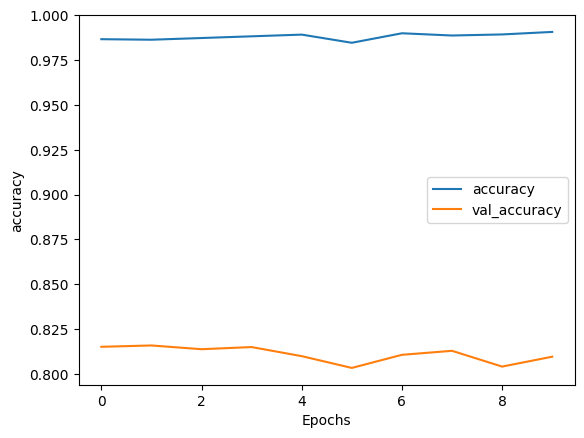

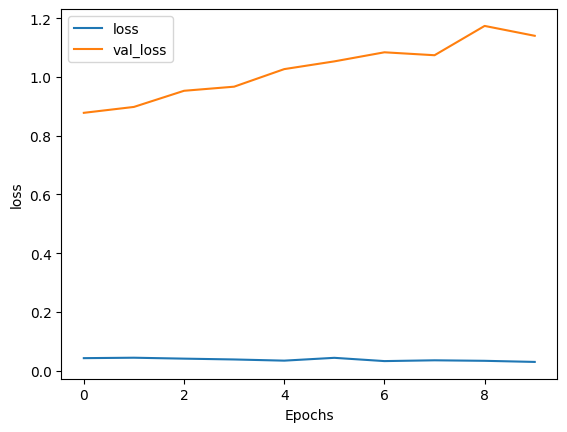

In [33]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graph(hist, "accuracy")
plot_graph(hist, "loss")